In [31]:
import pandas as pd

In [32]:

file_path = "/content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv"
df = pd.read_csv(file_path, encoding='cp949')
display(df)


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202510,1호선,동대문,707,32,10682,1943,9093,6563,14913,...,10166,894,2991,4,255,0,0,0,0,20251103
1,202510,1호선,동묘앞,189,4,2749,821,3676,5334,8282,...,4603,101,1949,0,274,0,0,0,0,20251103
2,202510,1호선,서울역,699,76,10360,10015,28910,60809,90766,...,29929,4976,8215,12,167,0,0,0,0,20251103
3,202510,1호선,시청,161,5,1830,5534,3857,29099,7542,...,3284,643,862,0,19,0,0,0,0,20251103
4,202510,1호선,신설동,443,8,8007,2116,9597,8295,20710,...,9296,389,2735,0,2,0,0,0,0,20251103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77381,201501,중앙선,운길산,0,0,177,56,642,403,1292,...,633,3,222,0,0,0,0,0,0,20151223
77382,201501,중앙선,원덕,1,0,292,4,415,46,537,...,383,3,157,0,0,0,0,0,0,20151223
77383,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,6501,86,1617,0,0,0,0,0,0,20151223
77384,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,336,8,85,0,0,0,0,0,0,20151223


In [33]:
import pandas as pd

# 1. CSV 불러오기
file_path = "/content/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv"
df = pd.read_csv(file_path, encoding='cp949')

# 2. 날짜 컬럼 찾기 (보통 '사용일자' 혹은 '날짜' 같은 이름)
#    '일자'라는 글자가 들어간 첫 번째 컬럼을 날짜로 사용
date_col = [c for c in df.columns if '일자' in c][0]

# 3. date 컬럼 생성 (YYYYMMDD 형식 가정)
df['date'] = pd.to_datetime(df[date_col].astype(str), format='%Y%m%d')

# 4. 숫자형(승차/하차) 컬럼 정수로 변환
num_cols = [col for col in df.columns if ('승차' in col) or ('하차' in col)]

for col in num_cols:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# 5. 시간대 승차 컬럼만 골라서 일별 합계 계산
ride_cols = [col for col in df.columns if ('승차' in col) and ('합계' not in col)]

df_daily = df.groupby('date')[ride_cols].sum()

# 6. 각 날짜별 총 승차량 합산
df_daily['total_rides'] = df_daily.sum(axis=1)

df_daily.head()


,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,total_rides
date,,,,,,,,,,,,,,,,,,,,,
2015-12-08,105794,3102691,6495439,17776764,20478595,12739986,9542597,9556642,10407942,11018125,...,13846064,10603783,10252966,8671017,3921240,505170,413,12,1,223497154
2015-12-23,1027554,30889533,66496286,175934193,194388079,122414446,94425298,94825779,102809540,108829298,...,140343020,107717703,103539024,89294744,40430205,5194819,13071,246,122,2196851615
2016-01-08,98037,3068430,6386198,17354452,20366878,12712390,9952937,10311007,11075535,11734358,...,14323636,11044791,10889944,9538457,4619500,678164,23893,174,3,233155014
2016-02-08,82557,2779125,5879112,15376028,18201929,11534310,8978262,9277305,10210244,10949907,...,13438427,10147989,9751469,8203562,3719519,443940,367,38,60,209273211
2016-03-08,73915,2496458,5321878,14040563,16353871,10514408,8408388,8723767,9626713,10353099,...,12530080,9480751,9029377,7596623,3507763,447610,4417,40,8,193647156


In [34]:
# 시간대 승차 컬럼만 추출
ride_cols = [col for col in df.columns if '승차' in col and '합계' not in col]

# 날짜+총승차량 데이터프레임 생성
df_daily = df.groupby('date')[ride_cols].sum()

# 총 승차량 합산
df_daily['total_rides'] = df_daily.sum(axis=1)

df_daily.head()


,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,total_rides
date,,,,,,,,,,,,,,,,,,,,,
2015-12-08,105794,3102691,6495439,17776764,20478595,12739986,9542597,9556642,10407942,11018125,...,13846064,10603783,10252966,8671017,3921240,505170,413,12,1,223497154
2015-12-23,1027554,30889533,66496286,175934193,194388079,122414446,94425298,94825779,102809540,108829298,...,140343020,107717703,103539024,89294744,40430205,5194819,13071,246,122,2196851615
2016-01-08,98037,3068430,6386198,17354452,20366878,12712390,9952937,10311007,11075535,11734358,...,14323636,11044791,10889944,9538457,4619500,678164,23893,174,3,233155014
2016-02-08,82557,2779125,5879112,15376028,18201929,11534310,8978262,9277305,10210244,10949907,...,13438427,10147989,9751469,8203562,3719519,443940,367,38,60,209273211
2016-03-08,73915,2496458,5321878,14040563,16353871,10514408,8408388,8723767,9626713,10353099,...,12530080,9480751,9029377,7596623,3507763,447610,4417,40,8,193647156


In [35]:


file__path = '/content/서울특별시 성북구_월별강수량_20230317.csv'
weather = pd.read_csv(file__path, encoding='cp949')   # weather = DataFrame

weather.head()


,측정연월,강수량(mm)
0,2022-01,12.0
1,2022-02,39.6
2,2022-03,1011.9
3,2022-04,204.1
4,2022-05,58.2


In [36]:
print(weather.columns)


Index(['측정연월', '강수량(mm)'], dtype='object')


In [37]:
weather['date'] = pd.to_datetime(weather['측정연월'])


In [38]:
# 예시: 강수량 컬럼명이 '강수량(mm)' 라고 가정
daily_weather = (
    weather
    .groupby(weather['date'].dt.date)['강수량(mm)']
    .sum()
    .reset_index()
)

daily_weather.rename(columns={'강수량(mm)': 'rain_mm'}, inplace=True)
daily_weather.head()


,date,rain_mm
0,2022-01-01,12.0
1,2022-02-01,39.6
2,2022-03-01,1011.9
3,2022-04-01,204.1
4,2022-05-01,58.2


In [42]:

# 1) 지하철 일별 데이터 정리
# df_daily: 날짜 index, total_rides 컬럼이 이미 있다고 가정

df_daily_reset = df_daily.copy()

# 인덱스를 컬럼으로 빼고, 인덱스는 숫자 인덱스로 초기화
df_daily_reset = df_daily_reset.reset_index()   # 여기서 'date'라는 컬럼이 생김

# date 컬럼을 날짜만 남기기 (datetime.date 형식)
df_daily_reset['date'] = pd.to_datetime(df_daily_reset['date']).dt.date

# 병합에 필요한 컬럼만 남기기
df_daily_reset = df_daily_reset[['date', 'total_rides']]


# 2) 날씨 데이터 정리 (daily_weather)

# 혹시 모를 인덱스 이름 제거 및 초기화
daily_weather = daily_weather.reset_index(drop=True)

# date 컬럼도 날짜만 남기기
daily_weather['date'] = pd.to_datetime(daily_weather['date']).dt.date


# 3) 날짜 기준 병합
df_merged = pd.merge(df_daily_reset, daily_weather, on='date', how='inner')

df_merged.head()



,date,total_rides,rain_mm


In [43]:
df_merged = pd.merge(df_daily_reset, daily_weather, on='date', how='inner')
df_merged.head()


,date,total_rides,rain_mm


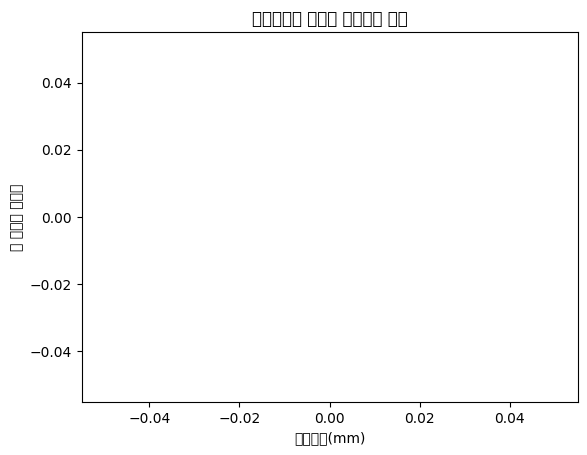

In [45]:
import matplotlib.pyplot as plt

plt.scatter(df_merged['rain_mm'], df_merged['total_rides'])
plt.xlabel('일강수량(mm)')
plt.ylabel('총 지하철 승차량')
plt.title('일강수량과 지하철 이용량의 관계')
plt.show()
